In [1]:
import numpy as np
import sympy

from PIL import Image
from imageio import imread

import matplotlib.pyplot as plt

## Ввод матрицы

--------------------------------
$A$ - исходная матрица, некоторые элементы которой могут быть пропущены (на их месте необходимо поставить любое значение)    
$x_{ind}$ - список индексов, на которых стоят неизвестные элементы (нумерация с 0)     
$X$ - матрица-маска, на месте (ij) стоит 1, если данный элемент пропущен, 0 -- в противном случае

Пример:    
A = np.array([[1, 1], [1, 1]])     
x_ind = [[0, 0]]    
X = [[1, 0], [0, 0]]

Это значит, что матрица $A$ имеет следующий вид:    
$$
\left(
\begin{array}{cc}
* & 1 \\
1 & 1
\end{array}
\right),
$$
где $*$ - неизвесный или пропущенный элемент.

In [2]:
A = np.array([[1, 1, 0], [1, 0, 1]])

x_ind = [[0, 0]]
X = [[1, 0, 0], [0, 0, 0]]

В курсовой работе были выведены ограничения для данного случая, из чего делаем вывод, что ограничения должны быть следующими:
$$
\begin{array}{ccccc}
\sqrt{2} & \leq & \sigma_1 &      & \\
0        & <    & \sigma_2 & \leq & \sqrt{2}
\end{array}
$$

___Пробная картинка___:

In [3]:
# from util import load_mnist
# X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

# plt.figure(figsize=[6, 6])
# for i in range(4):
#     plt.subplot(2, 2, i + 1)
#     plt.title("Label: %i" % y_train[i])
#     plt.imshow(X_train[i].reshape([28, 28]), cmap='gray')

In [4]:
# plt.imshow(X_train[0].reshape([28, 28]), cmap='gray')

In [5]:
# X_train[0].reshape([28, 28])

In [6]:
# A_mnist = X_train[0].reshape([28, 28]).copy()

# mask_mnist = np.zeros((28, 28))
# mask_mnist[::4, ::4] = 1

# x_mnist = [[i, j] for i in range(0, 28, 4) for j in range(0, 28, 4)]

# A_mnist[mask_mnist==1] = 1

In [7]:
# plt.imshow(A_mnist, cmap='gray')

In [8]:
# img = imread(r'./leaves.jpg', pilmode='L')
# print(img.shape)

# imgplot = plt.imshow(img, cmap='gray')

In [9]:
# A_leaves = np.array(img)

# mask_leaves = np.zeros((1000, 1000))
# mask_leaves[::4, ::4] = 1

# x_leaves = [[i, j] for i in range(0, 1000, 4) for j in range(0, 1000, 4)]

# A_leaves[mask_leaves==1] = 1
# imgplot = plt.imshow(A_leaves, cmap='gray')

### Наивный метод
-------------------------------
Для проверки и сравнения реализуем для начала наивный метод, который заключается в подстановке значений из некоторого отрезка на места неизвестных элементов и оценивая верхнюю и нижнюю границы сингулярных чисел.     
Данный алгоритм реализуется через перебор всех возможных комбинаций элементов, поэтому его сложность будет расти экспоненциально от количества неизвестных элементов.

In [10]:
# Генерация всех возможных значений сингулярных чисел
# Искомые комбинации будут находится в массиве a_range
def gen(a_range, x, left_bound, right_bound, step, depth):
    
    for i in range(left_bound, right_bound + step, step):
        x[depth] = i
        if depth == len(x) - 1:
            a_range.append(x.copy())
        else:
            gen(a_range, x, left_bound, right_bound, step, depth + 1)

In [11]:
# Находит границы на сингулярные числа наивным алгоритмом
def base_func(A, X, x_ind, left_bound=-10, right_bound=11, step=1):
# -------------------------------------------------------------
# Данная функция является реализацией наивного метода:
# сначала генерируются все возможные подстановки неизвестных
# элементов, затем по полченным сингулярным числам на этих
# подстановках находятся примерные оценки на сингулярные числа
# -------------------------------------------------------------
    n = len(x_ind)             # кол-во неизвестных элементов
    
    calc = [] # список элементов вида [комбинация_неизвестных_элементов,значения_сингулярных_чисел]
    
    # генерация всех комбинаций неизвестных элементов
    a_range = []
    list_x = [left_bound]*n
    gen(a_range, list_x, left_bound, right_bound, step, 0)
    
    # Поиск и оценки на сингулярные числа
    singular_values = []
    singular_values_min = []
    singular_values_max = []
    for i in a_range:
        A_x = A.copy()
        np.putmask(A_x, X, i)
        _, sing_val, _ = np.linalg.svd(A_x)
        calc.append([i.copy(), sing_val.copy()])
        sing_val.sort()
        singular_values.append(sing_val)
        singular_values_min.append(sing_val.min())
        singular_values_max.append(sing_val.max())
    print("Нижние границы на сингулярные значения: ", np.array(singular_values).min(axis=0))
    print("Верхние границы на сингулярные значения:", np.array(singular_values).max(axis=0))
    return min(singular_values_min), max(singular_values_max), calc

In [341]:
A = np.array([[1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0]])

x_ind = [[0, 0], [0, 1]]
X = [[1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [342]:
x, y, calc = base_func(A, X, x_ind)
print("")
print(x, "<= sigma_i <=", y, " for all i")

Нижние границы на сингулярные значения:  [9.93013661e-17 1.17558915e+00 1.90211303e+00]
Верхние границы на сингулярные значения: [ 1.1755705   1.9021011  15.67147779]

9.930136612989094e-17 <= sigma_i <= 15.671477793035697  for all i


In [340]:
np.linalg.svd([[1, 1, 0], [0, 1, 0]])

(array([[-0.85065081, -0.52573111],
        [-0.52573111,  0.85065081]]),
 array([1.61803399, 0.61803399]),
 array([[-0.52573111, -0.85065081,  0.        ],
        [-0.85065081,  0.52573111,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

### Реализация метода, предложенного в курсовой работе
----------------------------
Обратите внимание, значение $-1$ подразумевает собой $+\infty$.

In [13]:
class matrix_sv:
    def __init__(self, A, x_ind):
        self.A = A.copy()
        self.x_ind = x_ind.copy()
        self.x_ind.sort(key=lambda elem: elem[0] * max(np.array(self.A).shape) + elem[1])
    
    # Меняем i-ую строку на нулевую и наоборот
    # Меняем j-ый столбец на нулевой и наоборот
    # elem = (i, j)
    def change_row_column(self, elem):
        A_ = self.A.copy()
        self.A[0] = A_[elem[0]]
        self.A[elem[0]] = A_[0]
        
        A_ = self.A.copy()
        self.A[:, 0] = A_[:, elem[1]]
        self.A[:, elem[1]] = A_[:, 0]       
        
    
    # Перемещаем какой-нибудь неизвестный элемент на (0,0) место
    def move_x(self):
        if len(self.x_ind) == 0:
            return 0
        f_elem = self.x_ind[0].copy()
        self.change_row_column(f_elem)
        for elem in self.x_ind:
            if elem[0] == f_elem[0]:
                elem[0] = 0
            if elem[1] == f_elem[1]:
                elem[1] = 0
        return 1
    
    # Делим матрицу на две, удаляя первую строку или первый столбец
    def div_matrix(self):
        left = matrix_sv(self.A[1:], (np.array(self.x_ind) - [1, 0]).tolist())
        for i in range(np.array(left.A).shape[1]):
            try:
                left.x_ind.remove([-1, i])
            except Exception:
                1
        right = matrix_sv(self.A[:, 1:], (np.array(self.x_ind) - [0, 1]).tolist())
        for i in range(np.array(right.A).shape[0]):
            try:
                right.x_ind.remove([i, -1])
            except Exception:
                1
        return left, right
    
    # Выполняет алгоритм, описанный в курсовой
    def find_sv(self):
        n = min(np.array(self.A).shape)
        min_sv = [0]*n
        max_sv = [-1]*n
        if n == 1:
            if len(self.x_ind) == max(np.array(self.A).shape):
                return min_sv, max_sv
            if len(self.x_ind) > 0:
                self.move_x()
                if len(self.A[1:]) > 0:
                    next_m = matrix_sv(self.A[1:], (np.array(self.x_ind) - [1, 0]).tolist())
                    for i in range(np.array(next_m.A).shape[1]):
                        try:
                            next_m.x_ind.remove([-1, i])
                        except Exception:
                            1
                else:
                    next_m = matrix_sv(self.A[:, 1:], (np.array(self.x_ind) - [0, 1]).tolist())
                    try:
                        next_m.x_ind.remove([i, -1])
                    except Exception:
                        1
                min_sv, _ = next_m.find_sv()
                return min_sv, max_sv
            return [np.sum(np.array(self.A)**2)**(1/2)], [np.sum(np.array(self.A)**2)**(1/2)]
        
        if self.move_x() == 0:
            values = np.linalg.svd(self.A)[1].tolist()
            return values, values
        
        left, right = self.div_matrix()
        l_min, l_max = left.find_sv()
        r_min, r_max = right.find_sv()
        
        if len(l_min) < n:
            l_min.append(0)
        if len(r_min) < n:
            r_min.append(0)
        if len(l_max) < n:
            l_max.append(-1)
        if len(r_max) < n:
            r_max.append(-1)
        
        for i in range(n):
            min_sv[i] = max(l_min[i], r_min[i])
            if i > 0:
                if (l_max[i - 1] == -1) or (r_max[i - 1] == -1):
                    max_sv[i] = -1
                else:
                    max_sv[i] = min(l_max[i - 1], r_max[i - 1])
        
        return min_sv, max_sv

In [14]:
A_matrix = matrix_sv(A, x_ind)
min_sv, max_sv = A_matrix.find_sv()


print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv)

Нижние границы на сингулярные значения:  [1.4142135623730951, 1.0]
Верхние границы на сингулярные значения: [-1, 1.0]


In [15]:
# A_matrix = matrix_sv(A_mnist, x_mnist)
# min_sv, max_sv = A_matrix.find_sv()


# print("Нижние границы на сингулярные значения: ", min_sv, "\n")
# print("Верхние границы на сингулярные значения:", max_sv)

## Достижение границ

___Тест первый:___    
$$
\text{Матрица }
\begin{pmatrix}
x & 1
\end{pmatrix}
$$

In [16]:
values1 = []
for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[x], [1]]))
    sv.sort()
    values1.append(sv[0])
    
A_matrix = matrix_sv(np.array([[1], [1]]), [[0, 0]])
min_sv, max_sv = A_matrix.find_sv()

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [1.0]
Верхние границы на сингулярные значения: [-1] 

При подстановке конкретных значений:
Найденное минимальное значение (0): 1.0


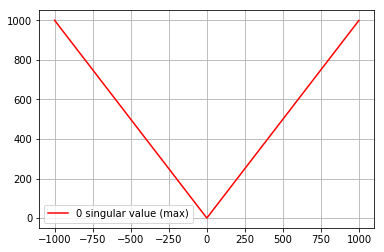

In [17]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")

print("При подстановке конкретных значений:")
print("Найденное минимальное значение (0):", min(values1))

plt.plot(range(-10**3, 10**3), values1, color='r', label="0 singular value (max)")

plt.legend()
plt.grid(True)

___Тест второй:___    
$$
\text{Матрица }
\begin{pmatrix}
x & 1\\
1 & 1
\end{pmatrix}
$$

In [402]:
values1 = []
values2 = []
for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[x, 1], [0, 1]]))
    sv.sort()
    values1.append(sv[0])
    values2.append(sv[1])
    
A_matrix = matrix_sv(np.array([[1, 1], [1, 1]]), [[0, 0]])
min_sv, max_sv = A_matrix.find_sv()

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [1.4142135623730951, 0]
Верхние границы на сингулярные значения: [-1, 1.4142135623730951] 

При подстановке конкретных значений:
Найденное минимальное значение (1): 0.0 
Найденное максимальное значение (1): 0.9999994999998751 

Найденное минимальное значение (0): 1.4142135623730951 
Найденное максимальное значение (0): 1000.0005000003749


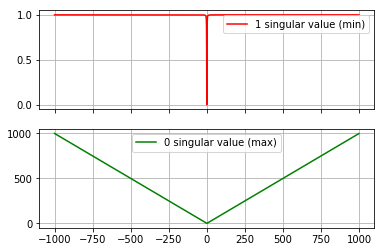

In [403]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")


print("При подстановке конкретных значений:")
print("Найденное минимальное значение (1):", min(values1), "\nНайденное максимальное значение (1):", max(values1), "\n")
print("Найденное минимальное значение (0):", min(values2), "\nНайденное максимальное значение (0):", max(values2))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(range(-10**3, 10**3), values1, color='r', label="1 singular value (min)")
ax2.plot(range(-10**3, 10**3), values2, color='g', label="0 singular value (max)")

ax1.legend()
ax1.grid(True)

ax2.legend()
ax2.grid(True)

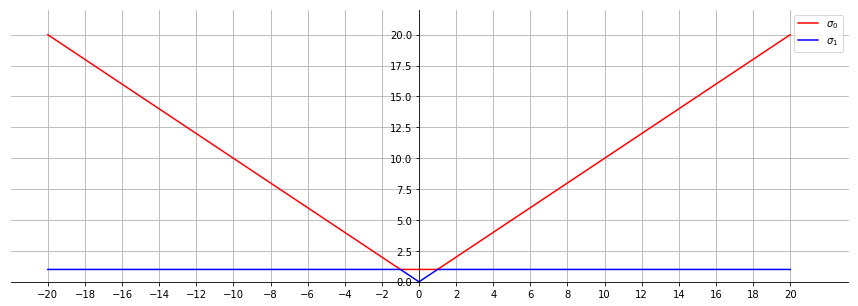

In [428]:
values1 = []
values2 = []
for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[0, x], [1, 0]]))
    sv.sort()
    values1.append(sv[0])
    values2.append(sv[1])

f = plt.figure(figsize=(15,5))
plt.plot(range(-20, 21), values2[980:1021], color='r', label=r"$\sigma_0$")
plt.plot(range(-20, 21), values1[980:1021], color='b', label=r"$\sigma_1$")
plt.grid(True)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlim(-20 * 1.1, 21 * 1.1)
plt.xticks(range(-20, 21, 2))

plt.ylim(min(values1[980:1021]) * 1.1, max(values2[980:1021]) * 1.1)
#plt.yticks([x for x in range(0, 25, 5)])

plt.legend()
plt.show()
f.savefig("example6_02.pdf")

In [427]:
values2

[999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,
 999.0,


___Тест третий:___    
$$
\text{Матрица }
\begin{pmatrix}
x & 0\\
1 & 1
\end{pmatrix}
$$

In [20]:
values1 = []
values2 = []
for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[x, 0], [1, 1]]))
    sv.sort()
    values1.append(sv[0])
    values2.append(sv[1])
    
A_matrix = matrix_sv(np.array([[1, 0], [1, 1]]), [[0, 0]])
min_sv, max_sv = A_matrix.find_sv()

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [1.4142135623730951, 0]
Верхние границы на сингулярные значения: [-1, 1.0] 

При подстановке конкретных значений:
Найденное минимальное значение (1): 0.0 
Найденное максимальное значение (1): 0.9999994999998749 

Найденное минимальное значение (0): 1.4142135623730951 
Найденное максимальное значение (0): 1000.000500000375


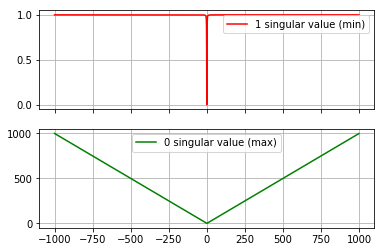

In [21]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")


print("При подстановке конкретных значений:")
print("Найденное минимальное значение (1):", min(values1), "\nНайденное максимальное значение (1):", max(values1), "\n")
print("Найденное минимальное значение (0):", min(values2), "\nНайденное максимальное значение (0):", max(values2))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(range(-10**3, 10**3), values1, color='r', label="1 singular value (min)")
ax2.plot(range(-10**3, 10**3), values2, color='g', label="0 singular value (max)")

ax1.legend()
ax1.grid(True)

ax2.legend()
ax2.grid(True)

In [382]:
values1 = []
values2 = []
values3 = []

for i in range(-10**3, 10**3):
    for j in range(-10**3, 10**3):
        x = i
        y = j
        _, sv, _ = np.linalg.svd(np.array([[x, 0, 1, 0], [1, y, 0, 1], [1, 1, 1, 1], [0, 0, 1, 0]]))
        values1.append(sv[0])
        values2.append(sv[1])
        values3.append(sv[2])
    
A_matrix = matrix_sv(np.array([[x, 0, 1, 0], [1, y, 0, 1], [1, 1, 1, 1], [0, 0, 1, 0]]), [[0, 0], [1, 1]])
min_sv, max_sv = A_matrix.find_sv()

In [386]:
np.linalg.svd([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

(array([[-0.40824829,  0.57735027, -0.70710678],
        [-0.81649658, -0.57735027,  0.        ],
        [-0.40824829,  0.57735027,  0.70710678]]),
 array([2.00000000e+00, 1.00000000e+00, 5.55111512e-17]),
 array([[-0.40824829, -0.81649658, -0.40824829],
        [-0.57735027,  0.57735027, -0.57735027],
        [ 0.70710678,  0.        , -0.70710678]]))

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [2.1753277471610746, 1.1755705045849465, 5.551115123125781e-17, 0]
Верхние границы на сингулярные значения: [-1, -1, 1.9021130325903068, 0.8349996181244669] 

При подстановке конкретных значений:
Найденное минимальное значение (2): 1.9470980855300442e-16 
Найденное максимальное значение (2): 1.8998000262650288 

Найденное минимальное значение (1): 1.238389600996374 
Найденное максимальное значение (1): 999.5016237492467 

Найденное минимальное значение (0): 2.200508050274823 
Найденное максимальное значение (0): 1000.500624750242


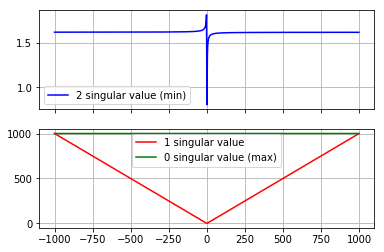

In [387]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")


print("При подстановке конкретных значений:")
print("Найденное минимальное значение (2):", min(values3), "\nНайденное максимальное значение (2):", max(values3), "\n")
print("Найденное минимальное значение (1):", min(values2), "\nНайденное максимальное значение (1):", max(values2), "\n")
print("Найденное минимальное значение (0):", min(values1), "\nНайденное максимальное значение (0):", max(values1))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(range(-10**3, 10**3), values3[::2*10**3], color='b', label="2 singular value (min)")
ax2.plot(range(-10**3, 10**3), values2[::2*10**3], color='r', label="1 singular value")
ax2.plot(range(-10**3, 10**3), values1[::2*10**3], color='g', label="0 singular value (max)")

ax1.legend()
ax1.grid(True)

ax2.legend()
ax2.grid(True)


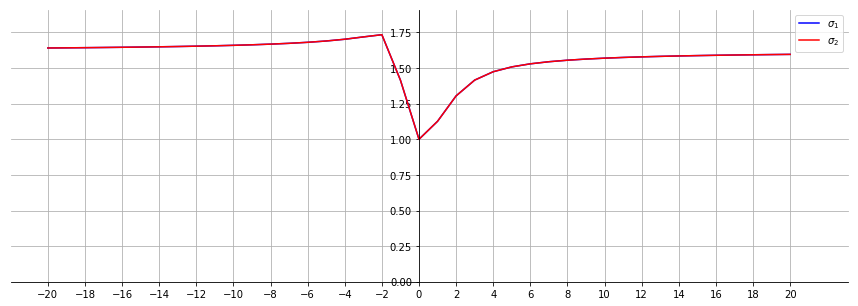

In [398]:
f = plt.figure(figsize=(15,5))
plt.plot(range(-20, 21), values3[980:1021], color='b', label=r"$\sigma_1$")
plt.plot(range(-20, 21), values3[980:1021], color='r', label=r"$\sigma_2$")
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlim(-20 * 1.1, 21 * 1.1)
plt.xticks(range(-20, 21, 2))

plt.ylim(0, max(values3[980:1021]) * 1.1)
#plt.yticks([round(x/10, 2) for x in range(2, 16, 2)])

plt.show()
f.savefig("example2_02.pdf")

In [348]:
values1 = []
values2 = []

for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[x, 1, 0, 1], [0, 1, 1, 0]]))
    values1.append(sv[0])
    values2.append(sv[1])
    
A_matrix = matrix_sv(np.array([[x, 1, 0, 1], [0, 1, 1, 0]]), [[0, 0]])
min_sv, max_sv = A_matrix.find_sv()

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [1.732050807568877, 1.0]
Верхние границы на сингулярные значения: [-1, 1.4142135623730951] 

При подстановке конкретных значений:
Найденное минимальное значение (1): 1.0000000000000002 
Найденное максимальное значение (1): 1.4142132088196602 

Найденное минимальное значение (0): 1.7320508075688772 
Найденное максимальное значение (0): 1000.0010000000001


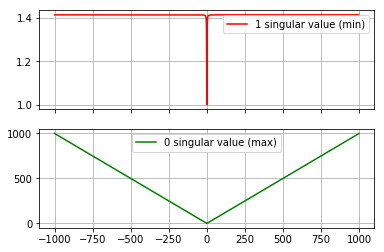

In [351]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")


print("При подстановке конкретных значений:")
print("Найденное минимальное значение (1):", min(values2), "\nНайденное максимальное значение (1):", max(values2), "\n")
print("Найденное минимальное значение (0):", min(values1), "\nНайденное максимальное значение (0):", max(values1))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(range(-10**3, 10**3), values2, color='r', label="1 singular value (min)")
ax2.plot(range(-10**3, 10**3), values1, color='g', label="0 singular value (max)")

ax1.legend()
ax1.grid(True)

ax2.legend()
ax2.grid(True)

___Тест четвертый:___    
$$
\text{Матрица }
\begin{pmatrix}
x & 0\\
0 & 1
\end{pmatrix}
$$

In [22]:
values1 = []
values2 = []
for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[x, 0], [0, 1]]))
    sv.sort()
    values1.append(sv[0])
    values2.append(sv[1])
    
A_matrix = matrix_sv(np.array([[1, 0], [0, 1]]), [[0, 0]])
min_sv, max_sv = A_matrix.find_sv()

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [1.0, 0]
Верхние границы на сингулярные значения: [-1, 1.0] 

При подстановке конкретных значений:
Найденное минимальное значение (1): 0.0 
Найденное максимальное значение (1): 1.0 

Найденное минимальное значение (0): 1.0 
Найденное максимальное значение (0): 1000.0


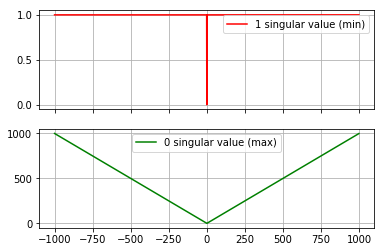

In [23]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")


print("При подстановке конкретных значений:")
print("Найденное минимальное значение (1):", min(values1), "\nНайденное максимальное значение (1):", max(values1), "\n")
print("Найденное минимальное значение (0):", min(values2), "\nНайденное максимальное значение (0):", max(values2))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(range(-10**3, 10**3), values1, color='r', label="1 singular value (min)")
ax2.plot(range(-10**3, 10**3), values2, color='g', label="0 singular value (max)")

ax1.legend()
ax1.grid(True)

ax2.legend()
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)ax2.grid(True)

___Тест пятый:___    
$$
\text{Матрица }
\begin{pmatrix}
x & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 0
\end{pmatrix}
$$

In [175]:
np.linalg.svd([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

(array([[ 0.70710678,  0.        ,  0.70710678],
        [ 0.        , -1.        ,  0.        ],
        [ 0.70710678,  0.        , -0.70710678]]),
 array([ 1.41421356,  1.41421356, -0.        ]),
 array([[ 0.        ,  1.        ,  0.        ],
        [-0.70710678,  0.        , -0.70710678],
        [-0.70710678,  0.        ,  0.70710678]]))

In [230]:
values1 = []
values2 = []
values3 = []
for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[x, 1, 0], [1, 0, 1], [0, 1, 0]]))
    sv.sort()
    values1.append(sv[0])
    values2.append(sv[1])
    values3.append(sv[2])
    
A_matrix = matrix_sv(np.array([[x, 1, 0], [1, 0, 1], [0, 1, 0]]), [[0, 0]])
min_sv, max_sv = A_matrix.find_sv()

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [1.4142135623730951, 1.0, 0]
Верхние границы на сингулярные значения: [-1, 1.4142135623730951, 1.0] 

При подстановке конкретных значений:
Найденное минимальное значение (2): -0.0 
Найденное максимальное значение (2): 0.9994996250004301 

Найденное минимальное значение (1): 1.0004996250004292 
Найденное максимальное значение (1): 1.4142135623730951 

Найденное минимальное значение (0): 1.4142135623730951 
Найденное максимальное значение (0): 1000.0010000000001


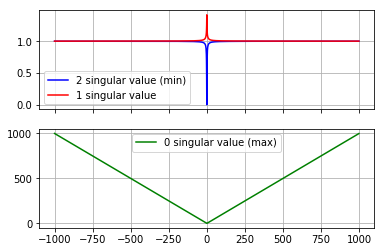

In [231]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")


print("При подстановке конкретных значений:")
print("Найденное минимальное значение (2):", min(values1), "\nНайденное максимальное значение (2):", max(values1), "\n")
print("Найденное минимальное значение (1):", min(values2), "\nНайденное максимальное значение (1):", max(values2), "\n")
print("Найденное минимальное значение (0):", min(values3), "\nНайденное максимальное значение (0):", max(values3))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(range(-10**3, 10**3), values1, color='b', label="2 singular value (min)")
ax1.plot(range(-10**3, 10**3), values2, color='r', label="1 singular value")
ax2.plot(range(-10**3, 10**3), values3, color='g', label="0 singular value (max)")

ax1.legend()
ax1.grid(True)

ax2.legend()
ax2.grid(True)

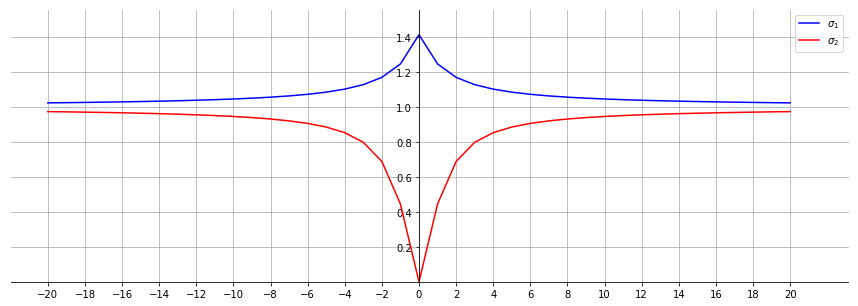

In [245]:
f = plt.figure(figsize=(15,5))
plt.plot(range(-20, 21), values2[980:1021], color='b', label=r"$\sigma_1$")
plt.plot(range(-20, 21), values1[980:1021], color='r', label=r"$\sigma_2$")
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlim(-20 * 1.1, 21 * 1.1)
plt.xticks(range(-20, 21, 2))

plt.ylim(0, max(values2[980:1021]) * 1.1)
plt.yticks([round(x/10, 2) for x in range(2, 16, 2)])

plt.show()
f.savefig("example2_02.pdf")

In [401]:
np.linalg.svd([[1,1], [0,1]])

(array([[ 0.85065081, -0.52573111],
        [ 0.52573111,  0.85065081]]),
 array([1.61803399, 0.61803399]),
 array([[ 0.52573111,  0.85065081],
        [-0.85065081,  0.52573111]]))

In [26]:
# Функция, которая будет находить означивание для достижения верхней или нижней границы
# какого-либо конкретного сингулярного числа
def find_A_by_sv(A, x_ind, index, type_bound="min"):
    if (index >= min(A.shape)) or (index < 0):
        print("Не существует сингулярное число с индексом ", index)
    return (True, A)

In [27]:
A = np.array([[1, 1], [1, 1], [1, 1]])

x_ind = [[0, 0]]
X = [[1, 0], [0, 0]]

A_matrix = matrix_sv(A, x_ind)
min_sv, max_sv = A_matrix.find_sv()

exist_flg, matrix_A = find_A_by_sv(A, x_ind, -1)

Не существует сингулярное число с индексом  -1


In [44]:
x_ind = [[0, 0], [1, 1]]

In [99]:
for x in range(-3):
    print(x)

In [365]:
class SV:
    def __init__(self, x_ind):
        self.lower_bound = 0
        self.lower_reach_flg = 1
        self.unkwn_for_reach_lb = np.array([[]] * len(x_ind))
        
        self.upper_bound = None
        self.upper_reach_flg = 0
        self.unkwn_for_reach_ub = np.array([[]] * len(x_ind))
        
    def check_bound(self, A, B, C, from_flg, type_bnd):
        # if from_flg then lower_bound = lower_bound(C -- right)
        # else lower_bound = lower_bound(B -- left -- lower)
        #
        # type_bnd = 'lower' or 'upper'
        
        if type_bnd == "lower":
            sigma = self.lower_bound
        else:
            sigma = self.upper_bound
            if sigma is None:
                return
        
        c = B.A[: , 0 ].reshape((-1, 1))
        r = C.A[0 , : ].reshape((-1, 1))
        K = C.A[1:, : ]
        L = c.dot(c.T) + K.dot(K.T) - sigma**2 * np.identity(c.shape[0])
        
        a = np.linalg.det(np.block([[1, c.T], [c, L]]))
        b = np.linalg.det(2 * np.block([[0, r.T.dot(K.T)], [c, L]]))
        c = np.linalg.det(np.block([[r.T.dot(r) - sigma**2, r.T.dot(K.T)], [K.dot(r), L]]))
        
        if abs(a) < 10**(-6):
            if abs(b) < 10**(-6):
                if abs(c) >= 10**(-6):
                    if type_bnd == "lower":
                        self.lower_reach_flg = 0
                    else:
                        self.upper_reach_flg = 0
                    print("No solution, a=b=0, c<>0")
                else:
                    if type_bnd == "lower":
                        self.lower_reach_flg = 1
                    else:
                        self.upper_reach_flg = 1
                    print("x - any, a=b=c=0")
            else:
                if type_bnd == "lower":
                    self.lower_reach_flg = 1
                else:
                    self.upper_reach_flg = 1
                print("x = ", -c/b, " a=0 b<>0")
        else:
            D = b * b - 4 * a * c
            if abs(D) < 10**(-6):
                x = -b/a
            elif D < 0:
                if type_bnd == "lower":
                    self.lower_reach_flg = 0
                else:
                    self.upper_reach_flg = 0
                print("No solution, a<>0 D<0")
            else:
                if type_bnd == "lower":
                    self.lower_reach_flg = 1
                else:
                    self.upper_reach_flg = 1
                x_1 = 1/2 * (-b + np.sqrt(D))
                x_2 = 1/2 * (-b - np.sqrt(D))
                print("x_1 = ", x_1, " x_2 = ", x_2)
        
#         if type_bnd == "lower":
#             if (l_sv[i].lower_bound < r_sv[i].lower_bound) and (r_sv[i].lower_reach_flg == 1):
#                 for j in range(len(right.x_ind)):
#                     self.A[right.x_ind[j][0], right.x_ind[j][1] + 1] = r_sv[i].unkwn_for_reach_lb[j]
#                 c = self.A[1:, 1 ].reshape((-1, 1))
#                 r = self.A[1 , 1:].reshape((-1, 1))
#                 K = self.A[1:, 1:]
#                 L = r.dot(r.T) + K.T.dot(K) - r_sv[i].lower_bound * np.identity(r.shape[0])
                
#                 a = np.linalg.det(np.block([[1, r.T], [r, L]]))
#                 b = np.linalg.det(2 * np.block([[0, c.T.dot(K)], [r, L]]))
#                 c = np.linalg.det(np.block([[c.T.dot(c) - r_sv[i].lower_bound, r.T.dot(K.T)], [K.T.dot(r), L]]))
                
#                 if abs(a) < 10**(-6):
#                     if abs(b) < 10**(-6):
#                         if abs(c) >= 10**(-6):
#                             print("No solution, a=b=0, c<>0")
#                         else:
#                             print("x - any, a=b=c=0")
#                     else:
#                         print("x = ", -c/b, " a=0 b<>0")
#                 else:
#                     D = b * b - 4 * a * c
#                     if abs(D) < 10**(-6):
#                         x = -b/a
#                     elif D < 0:
#                         print("No solution, a<>0 D<0")
#                     else:
#                         x_1 = 1/2 * (-b + np.sqrt(D))
#                         x_2 = 1/2 * (-b - np.sqrt(D))
#                         print("x_1 = ", x_1, " x_2 = ", x_2)
                
#                 print(a, b, c, sep="\n")
#                 self.print_M()

In [379]:
class Partially_prescribed_matrix:
    def __init__(self, A, x_ind):
        self.A = A.copy()
        self.x_ind = x_ind.copy()
        self.x_ind.sort(key=lambda elem: elem[0] * max(np.array(self.A).shape) + elem[1])
        
        self.sv_fnd_flg = False
        self.sv = [SV(x_ind) for x in range(min(A.shape))]
            
    def print_M(self):
        print("--------PP Matrix--------")
        for i in range(self.A.shape[0]):
            for j in range(self.A.shape[1]):
                if [i, j] in self.x_ind:
                    print("x", end=" ")
                else:
                    print(self.A[i, j], end=" ")
            print(end="\n")
        print("-------------------------")
        
    def print_sv(self):
        if self.sv_fnd_flg == False:
            self.find_sv()
        for i in range(len(self.sv)):
            print("Номер сингулярного числа:", i, "\n  ", self.sv[i].lower_bound, "<", end="")
            if self.sv[i].lower_reach_flg == 1:
                print("= ", end="")
            else:
                print("  ")
            print("s ", end="")
            if self.sv[i].upper_bound is not None:
                print("<", end="")
                if self.sv[i].upper_reach_flg == 1:
                    print("= ", end="")
                else:
                    print("  ", end="")
                print(self.sv[i].upper_bound, end="")
            print(end="\n\n")
    
    # Меняем i-ую строку на нулевую и наоборот
    # Меняем j-ый столбец на нулевой и наоборот
    # elem = (i, j)
    def change_row_column(self, elem):
        A_ = self.A.copy()
        self.A[0] = A_[elem[0]]
        self.A[elem[0]] = A_[0]
        
        A_ = self.A.copy()
        self.A[:, 0] = A_[:, elem[1]]
        self.A[:, elem[1]] = A_[:, 0]       
        
    
    # Перемещаем какой-нибудь неизвестный элемент на (0,0) место
    def move_x(self):
        if len(self.x_ind) == 0:
            return 0
        f_elem = self.x_ind[0].copy()
        self.change_row_column(f_elem)
        for elem in self.x_ind:
            if elem[0] == f_elem[0]:
                elem[0] = 0
            if elem[1] == f_elem[1]:
                elem[1] = 0
        return 1
    
    # Делим матрицу на две, удаляя первую строку или первый столбец
    def div_matrix(self):
        left = Partially_prescribed_matrix(self.A[1:], (np.array(self.x_ind) - [1, 0]).tolist())
        for i in range(np.array(left.A).shape[1]):
            try:
                left.x_ind.remove([-1, i])
            except Exception:
                1
        right = Partially_prescribed_matrix(self.A[:, 1:], (np.array(self.x_ind) - [0, 1]).tolist())
        for i in range(np.array(right.A).shape[0]):
            try:
                right.x_ind.remove([i, -1])
            except Exception:
                1
        return left, right
    
    # Выполняет алгоритм, описанный в курсовой
    def find_sv(self):
        self.sv_fnd_flg = True
        
        for ind in self.x_ind:
            self.A[ind[0], ind[1]] = 0
            
        n = min(np.array(self.A).shape)
        
        if len(self.x_ind) == 0:
            values = np.linalg.svd(self.A)[1].tolist()
            for i in range(len(values)):
                self.sv[i].lower_bound = values[i]
                self.sv[i].lower_reach_flg = 1
                self.sv[i].upper_bound = values[i]
                self.sv[i].upper_reach_flg = 1
            return self.sv
        
        if n == 1:
            self.sv[0].lower_bound = np.sum(self.A)
            self.sv[0].lower_reach_flg = 1
            self.sv[0].unkwn_for_reach_lb = np.array([[0]] * len(self.x_ind))
            return self.sv
        
        left, right = self.div_matrix()
        l_sv = left.find_sv()
        r_sv = right.find_sv()
        
        for i in range(min(len(l_sv), len(r_sv))):
            if i != 0:
                if l_sv[i - 1].upper_bound is None:
                    self.sv[i].upper_bound = r_sv[i - 1].upper_bound
                    self.sv[i].check_bound(self, left, right, True, "upper")
                elif r_sv[i - 1].upper_bound is None:
                    self.sv[i].upper_bound = l_sv[i - 1].upper_bound
                    self.sv[i].check_bound(self, left, right, False, "upper")
                else:
                    self.sv[i].upper_bound = min(l_sv[i - 1].upper_bound, r_sv[i - 1].upper_bound)
                    self.sv[i].check_bound(self, left, right,
                                               (l_sv[i - 1].upper_bound >= r_sv[i - 1].upper_bound), "upper")
                
            self.sv[i].lower_bound = max(l_sv[i].lower_bound, r_sv[i].lower_bound)
            self.sv[i].check_bound(self, left, right, (l_sv[i].lower_bound < r_sv[i].lower_bound), "lower")
                  
        
        k = len(self.sv) - 1
        if l_sv[k - 1].upper_bound is None:
            self.sv[k].upper_bound = r_sv[k - 1].upper_bound
            self.sv[k].check_bound(self, left, right, True, "upper")
        elif r_sv[k - 1].upper_bound is None:
            self.sv[k].upper_bound = l_sv[k - 1].upper_bound
            self.sv[k].check_bound(self, left, right, False, "upper")
        else:
            self.sv[k].upper_bound = min(l_sv[k - 1].upper_bound, r_sv[k - 1].upper_bound)
            self.sv[k].check_bound(self, left, right, (l_sv[k - 1].upper_bound >= r_sv[k - 1].upper_bound), "upper")
                    
        if len(l_sv) > len(r_sv):
            print("O'm here ", len(l_sv) - 1)
            self.sv[len(l_sv) - 1].lower_bound = l_sv[len(l_sv) - 1].lower_bound
            self.sv[len(l_sv) - 1].check_bound(self, left, right, False, "lower")
        elif len(r_sv) > len(l_sv):
            print("OL'm here ", len(r_sv) - 1)
            self.sv[len(r_sv) - 1].lower_bound = r_sv[len(r_sv) - 1].lower_bound
            self.sv[len(r_sv) - 1].check_bound(self, left, right, True, "lower")
        else:
            print("I'm here ", len(l_sv) - 1)
            self.sv[len(r_sv) - 1].check_bound(self, left, right, True, "lower")
        
        return self.sv

In [381]:
A = np.array([[1, 1], [1, 0], [0, 1]])
x_ind = [[0, 0]]

M = Partially_prescribed_matrix(A, x_ind)
sv = M.find_sv()

M.print_M()
M.print_sv()

x - any, a=b=c=0
O'm here  1
x - any, a=b=c=0
--------PP Matrix--------
x 1 
1 0 
0 1 
-------------------------
Номер сингулярного числа: 0 
   1.4142135623730951 <= s 

Номер сингулярного числа: 1 
   1.0 <= s <= 1.0



In [251]:
np.linalg.svd([[1, 1, 0, 1], [1, 0, 1, 0]])

(array([[-0.85065081, -0.52573111],
        [-0.52573111,  0.85065081]]),
 array([1.90211303, 1.1755705 ]),
 array([[-0.7236068 , -0.4472136 , -0.2763932 , -0.4472136 ],
        [ 0.2763932 , -0.4472136 ,  0.7236068 , -0.4472136 ],
        [-0.5854102 ,  0.56032167,  0.5854102 ,  0.02508853],
        [-0.23936353, -0.53482673,  0.23936353,  0.77419026]]))

In [247]:
M = matrix_sv(A, x_ind)
M.find_sv()

([1.4142135623730951, 0], [-1, -1])

In [161]:
values1 = []
values2 = []
for i in range(-10**3, 10**3):
    x = i
    _, sv, _ = np.linalg.svd(np.array([[x, 0, 1], [0, 1, 1]]))
    sv.sort()
    values1.append(sv[0])
    values2.append(sv[1])
    
A_matrix = matrix_sv(np.array([[x, 0, 1], [0, 1, 1]]), [[0, 0]])
min_sv, max_sv = A_matrix.find_sv()

Согласно реализованному алгоритму:
Нижние границы на сингулярные значения:  [1.618033988749895, 0.6180339887498948]
Верхние границы на сингулярные значения: [-1, 1.4142135623730951] 

При подстановке конкретных значений:
Найденное минимальное значение (1): 0.6180339887498947 
Найденное максимальное значение (1): 1.4142132088193067 

Найденное минимальное значение (0): 1.6180339887498951 
Найденное максимальное значение (0): 1000.000500000375 



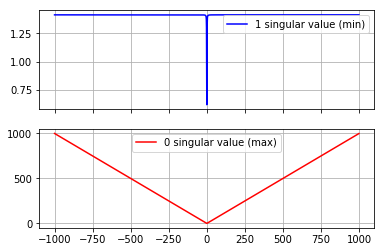

In [162]:
print("Согласно реализованному алгоритму:")
print("Нижние границы на сингулярные значения: ", min_sv)
print("Верхние границы на сингулярные значения:", max_sv, "\n")


print("При подстановке конкретных значений:")
print("Найденное минимальное значение (1):", min(values1), "\nНайденное максимальное значение (1):", max(values1), "\n")
print("Найденное минимальное значение (0):", min(values2), "\nНайденное максимальное значение (0):", max(values2), "\n")

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(range(-10**3, 10**3), values1, color='b', label="1 singular value (min)")
ax2.plot(range(-10**3, 10**3), values2, color='r', label="0 singular value (max)")

ax1.legend()
ax1.grid(True)

ax2.legend()
ax2.grid(True)

In [132]:
np.linalg.svd([[1, 1], [1, 1]])

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([2., 0.]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

## Заполнение с наименьшим рангом

Пример из библиотеки для поиска линейно независимых строк:

In [28]:
import sympy

A = [[1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1]]
print(A)
m, m_i = sympy.Matrix(np.array(A)).T.rref()
print("Индексы линейно независимых строк:", m_i)

[[1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1]]
Индексы линейно независимых строк: (0, 2)


In [29]:
def create_mask(x_ind, shape):
    mask = np.zeros(shape=shape)
    for ind in x_ind:
        mask[ind[0], ind[1]] = 1
    return mask
    
def low_rank_matrix(A, x_ind):
    n = min(np.array(A).shape)
    if n == np.array(A).shape[0]:
        rc_flg = 'r'
    else:
        rc_flg = 'c'
        
    # Матрица полностью известна
    if len(x_ind) == 0:
        return A, np.linalg.matrix_rank(A), 0
    
    # Матрица состоит из одной строки или одного столбца
    # Задача минимизации ранга решается занулением неизвестных
    if n == 1:
        A_result = A.copy()
        np.putmask(A_result, create_mask(x_ind, A_result.shape), 0)
        rank = np.linalg.matrix_rank(A_result)
        return A_result, rank, 0
    
    # Строка или столбец, содержащие x, полностью нулевые
    # Задача минимизации ранга решается занулением неизвестной
    if (A[0, 1:] != 0).sum() == 0:
        A_result = A.copy()
        A_result[0, 0] = 0
        rank = np.linalg.matrix_rank(A_result)
        #print("x must be ", 0, ". Rank = ", rank)
        return A_result, rank, 0
    if (A[1:, 0] != 0).sum() == 0:
        A_result = A.copy()
        A_result[0, 0] = 0
        rank = np.linalg.matrix_rank(A_result)
        #print("x must be ", 0, ". Rank = ", rank)
        return A_result, rank, 0
    
    # Матрица содержит лишь одну неизвестную
    # Задача минимизации ранга решается однозначно
    # (кроме случая, когда все равно, чему будет равна неизвестная, ранг и так будет минимальным)
    if len(x_ind) == 1:
        A_result = A.copy()
        
        _, down_m = sympy.Matrix(np.array(A[1:])).T.rref()
        if down_m:
            down_m = np.array(down_m) + 1
        else:
            down_m = np.array([1])
        
        _, right_m = sympy.Matrix(np.array(A[:, 1:])).rref()
        if right_m:
            right_m = np.array(right_m) + 1
        else:
            right_m = np.array([1])
        right_m = np.insert(right_m, 0, 0)
        
        down_mat = A[down_m]
        mat = np.insert(down_mat, 0, A[0], axis=0)
        mat = A[:, right_m]
        
        n = mat.shape[0]
        m = mat.shape[1]
        
        if n < m or n > m:
            #print("Doesn't matter. Rank = ", min(n, m))
            return A, min(n, m), 1
        else:
            det_sum = 0
            sign = -1
            for i in range(1, n):
                det_sum = sign * A[0, i] * np.linalg.det(np.delete(A[1:], i, 1))
                sign = sign * (-1)
            det_x = np.linalg.det(np.delete(A[1:], 0, 1))
            if (abs(det_x) < 10**(-6)) and det_sum != 0:
                #print("Doesn't matter. Rank = ", n)
                return A, n, 1
            elif abs(det_x) < 10**(-6):
                #print("Doesn't matter. Rank = ", n - 1)
                return A, n - 1, 1
            else:
                x = - det_sum / det_x
                A_result[0, 0] = x
                #print("x must be ", x, ". Rank = ", n - 1)
                return A_result, n - 1, 0
    
    return A, n

In [30]:
A = np.array([[0, 1], [1, 0], [0, 1]])
print("A = \n", A, "\n-------")

x_ind = [[0, 0]]
X = [[1, 0], [0, 0]]

A, rank_A, _ = low_rank_matrix(A, x_ind)
if _:
    print ("x - любой")
print('Минимальный ранг матрицы равен ', rank_A)
print('Пример заполнения матрицы:\n', A)

A = 
 [[0 1]
 [1 0]
 [0 1]] 
-------
x - любой
Минимальный ранг матрицы равен  2
Пример заполнения матрицы:
 [[0 1]
 [1 0]
 [0 1]]


In [31]:
# A_mnist = np.round(A_mnist * 100)
# AX_mnist = A_mnist.copy()
# for i in range(0, 28, 4):
#     for j in range(0, 28, 4):
#         A = A_mnist[i:(i+4), j:(j+4)]
#         x_ind = [[0, 0]]
#         X = mask_mnist[i:(i+4), j:(j+4)]
#         A, rank_A, m_flg = low_rank_matrix(A, x_ind)
#         A = np.mod(np.round(A), 256)
#         if m_flg == 1:
#             AX_mnist[i, j] = 255
#         else:
#             if A[0, 0] < 0:
#                 A[0, 0] = 0
#             if A[0, 0] > 255:
#                 A[0, 0] = 255
#             AX_mnist[i, j] = A[0, 0]

In [32]:
# plt.imshow(AX_mnist, cmap='gray')

In [33]:
# AX_leaves = A_leaves.copy()
# for i in range(0, 1000, 4):
#     for j in range(0, 1000, 4):
#         A = A_leaves[i:(i+4), j:(j+4)]
#         x_ind = [[0, 0]]
#         X = mask_leaves[i:(i+4), j:(j+4)]
#         A, rank_A, m_flg = low_rank_matrix(A, x_ind)
#         A = np.mod(np.round(A), 256)
#         if m_flg == 1:
#             AX_leaves[i, j] = A[1:, 1:].mean() 
#         else:
#             if A[0, 0] < 0:
#                 A[0, 0] = 0
#             if A[0, 0] > 1:
#                 A[0, 0] = 1
#             AX_leaves[i, j] = A[0, 0]

In [34]:
# plt.imshow(AX_leaves, cmap='gray')

In [35]:
# plt.imshow(img, cmap='gray')

In [36]:
# plt.imshow(A_leaves, cmap='gray')